Import thư viện

In [428]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import  MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, f1_score, roc_auc_score, roc_curve, recall_score

Tổng quan về dữ liệu

In [429]:
data = pd.read_csv('D:/Lập trình nhân tạo/fraud test.csv/fraud test.csv')

In [430]:
data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,21/06/2020 12:14,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,19/03/1968,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,21/06/2020 12:14,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",17/01/1990,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,21/06/2020 12:14,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",21/10/1970,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,21/06/2020 12:15,3.591920e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,25/07/1987,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,21/06/2020 12:15,3.526830e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,06/07/1955,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [431]:
data.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [432]:
# Hiển thị số liệu thống kê cơ bản về các tính năng số
print("\nThống kê cơ bản về đặc trưng số:")
print(data.describe())


Thống kê cơ bản về đặc trưng số:
          Unnamed: 0        cc_num            amt            zip  \
count  555719.000000  5.557190e+05  555719.000000  555719.000000   
mean   277859.000000  4.178387e+17      69.392810   48842.628015   
std    160422.401459  1.309837e+18     156.745941   26855.283328   
min         0.000000  6.041621e+10       1.000000    1257.000000   
25%    138929.500000  1.800430e+14       9.630000   26292.000000   
50%    277859.000000  3.521420e+15      47.290000   48174.000000   
75%    416788.500000  4.635330e+15      83.010000   72011.000000   
max    555718.000000  4.992350e+18   22768.110000   99921.000000   

                 lat           long      city_pop     unix_time  \
count  555719.000000  555719.000000  5.557190e+05  5.557190e+05   
mean       38.543253     -90.231325  8.822189e+04  1.380679e+09   
std         5.061336      13.721780  3.003909e+05  5.201104e+06   
min        20.027100    -165.672300  2.300000e+01  1.371817e+09   
25%        34.6689

In [433]:
# Hiển thị thông tin về tập dữ liệu bao gồm các loại dữ liệu và số lượng giá trị không null
print("\nInformation about the dataset:")
print(data.info())


Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  float64
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long

In [434]:
# Kiểm tra các giá trị còn thiếu
print("\nMissing values:")
print(data.isnull().sum())


Missing values:
Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64


In [435]:
# Check the unique values in each categorical feature
categorical_features = data.select_dtypes(include=['object'])
for column in categorical_features.columns:
    print(f"{column}: {data[column].unique()}")
    print("")

trans_date_trans_time: ['21/06/2020 12:14' '21/06/2020 12:15' '21/06/2020 12:16' ...
 '31/12/2020 23:57' '31/12/2020 23:58' '31/12/2020 23:59']

merchant: ['fraud_Kirlin and Sons' 'fraud_Sporer-Keebler'
 'fraud_Swaniawski, Nitzsche and Welch' 'fraud_Haley Group'
 'fraud_Johnston-Casper' 'fraud_Daugherty LLC' 'fraud_Romaguera Ltd'
 'fraud_Reichel LLC' 'fraud_Goyette, Howell and Collier'
 'fraud_Kilback Group' 'fraud_Feil, Hilpert and Koss'
 'fraud_Gottlieb Group' 'fraud_Connelly-Carter' 'fraud_Bechtelar-Rippin'
 'fraud_Lubowitz-Walter' 'fraud_Welch, Rath and Koepp'
 'fraud_Hickle Group' 'fraud_Lang, Towne and Schuppe'
 'fraud_Morissette LLC' 'fraud_Prosacco LLC' 'fraud_Corwin-Romaguera'
 'fraud_Tillman LLC' 'fraud_Veum-Koelpin'
 'fraud_Watsica, Haag and Considine' 'fraud_Leannon-Ward'
 'fraud_Hintz, Bauch and Smith' 'fraud_Labadie LLC'
 'fraud_Eichmann, Hayes and Treutel' 'fraud_Leffler-Goldner'
 'fraud_Kautzer and Sons' 'fraud_Ernser-Feest'
 'fraud_Zemlak, Tillman and Cremin' 'fraud_Ni

In [436]:
# Tính toán số lượng giao dịch gian lận và không gian lận
data['is_fraud'].value_counts()

is_fraud
0    553574
1      2145
Name: count, dtype: int64

In [437]:
data['is_fraud'].value_counts(normalize=True) * 100

is_fraud
0    99.614014
1     0.385986
Name: proportion, dtype: float64

In [438]:
data['job'].value_counts()

job
Film/video editor                4119
Exhibition designer              3968
Surveyor, land/geomatics         3756
Naval architect                  3750
Designer, ceramics/pottery       3463
                                 ... 
Estate manager/land agent         195
Engineer, civil (consulting)      194
Operational investment banker      11
Software engineer                  11
Engineer, water                     8
Name: count, Length: 478, dtype: int64

In [439]:
data['merchant'].value_counts()

merchant
fraud_Kilback LLC                        1859
fraud_Cormier LLC                        1597
fraud_Schumm PLC                         1561
fraud_Kuhn LLC                           1521
fraud_Dickinson Ltd                      1519
                                         ... 
fraud_Treutel-King                        323
fraud_Satterfield-Lowe                    319
fraud_Kessler Group                       318
fraud_Jerde-Hermann                       312
fraud_Ritchie, Bradtke and Stiedemann     304
Name: count, Length: 693, dtype: int64

In [440]:
data.nunique()

Unnamed: 0               555719
trans_date_trans_time    226976
cc_num                      904
merchant                    693
category                     14
amt                       37256
first                       341
last                        471
gender                        2
street                      924
city                        849
state                        50
zip                         912
lat                         910
long                        910
city_pop                    835
job                         478
dob                         910
trans_num                555719
unix_time                544760
merch_lat                546490
merch_long               551770
is_fraud                      2
dtype: int64

Xử lý dữ liệu

In [441]:
#kiểm tra trùng lặp
print(len(data[data.duplicated()]))


0


In [442]:
data.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [443]:
data['merchant'] = data['merchant'].str.replace("fraud_", "")

In [444]:
# Split trans_date_trans_time
data[['trans_date', 'trans_time']] = data['trans_date_trans_time'].str.split(' ', expand=True)

In [445]:
data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'])
data['trans_date'] = pd.to_datetime(data['trans_date'])
data['trans_time'] = pd.to_datetime(data['trans_time'], format= '%H:%M').dt.time
data['trans_time_group'] = data['trans_date_trans_time'].dt.hour
data['trans_month'] = data['trans_date'].dt.to_period('M').astype("str")
data['trans_dayOfWeek'] = data['trans_date'].dt.day_name()

C:\Users\PC\AppData\Local\Temp\ipykernel_18868\1664669014.py:1: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'])
C:\Users\PC\AppData\Local\Temp\ipykernel_18868\1664669014.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['trans_date'] = pd.to_datetime(data['trans_date'])


In [446]:
def calculate_age(dob):
    year_of_birth = int(dob.split('/')[-1])
    age = 2020 - year_of_birth
    return age

In [447]:
data['age'] = data['dob'].apply(calculate_age)
print(data[['dob', 'age']].head())

          dob  age
0  19/03/1968   52
1  17/01/1990   30
2  21/10/1970   50
3  25/07/1987   33
4  06/07/1955   65


In [448]:
print("Min age", data['age'].min())
print("Max age", data['age'].max())

Min age 15
Max age 96


In [449]:
def apply_age_group(age):
    if(age <= 18):
        return 'Teenager'
    elif (age <= 25):
        return "Young Adult"
    elif (age <= 64):
        return "Adult"
    else:
        return "Elder"

In [450]:
data['age_group'] = data['age'].apply(apply_age_group)

In [451]:
data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,merch_lat,merch_long,is_fraud,trans_date,trans_time,trans_time_group,trans_month,trans_dayOfWeek,age,age_group
0,0,2020-06-21 12:14:00,2.291160e+15,Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.986391,-81.200714,0,2020-06-21,12:14:00,12,2020-06,Sunday,52,Adult
1,1,2020-06-21 12:14:00,3.573030e+15,Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,39.450498,-109.960431,0,2020-06-21,12:14:00,12,2020-06,Sunday,30,Adult
2,2,2020-06-21 12:14:00,3.598220e+15,"Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.495810,-74.196111,0,2020-06-21,12:14:00,12,2020-06,Sunday,50,Adult
3,3,2020-06-21 12:15:00,3.591920e+15,Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.812398,-80.883061,0,2020-06-21,12:15:00,12,2020-06,Sunday,33,Adult
4,4,2020-06-21 12:15:00,3.526830e+15,Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.959148,-85.884734,0,2020-06-21,12:15:00,12,2020-06,Sunday,65,Elder


In [452]:
data.rename(columns={"Unnamed: 0":"id"}, inplace=True)

In [453]:
# Drop unnecessary columns
data = data.drop(['street', 'zip', 'city_pop', 'trans_num', 'unix_time', 'merch_lat', 'merch_long','first','last','dob','lat','long','id'], axis=1)

In [454]:
data.head()

,trans_date_trans_time,cc_num,merchant,category,amt,gender,city,state,job,is_fraud,trans_date,trans_time,trans_time_group,trans_month,trans_dayOfWeek,age,age_group
0,2020-06-21 12:14:00,2.291160e+15,Kirlin and Sons,personal_care,2.86,M,Columbia,SC,Mechanical engineer,0,2020-06-21,12:14:00,12,2020-06,Sunday,52,Adult
1,2020-06-21 12:14:00,3.573030e+15,Sporer-Keebler,personal_care,29.84,F,Altonah,UT,"Sales professional, IT",0,2020-06-21,12:14:00,12,2020-06,Sunday,30,Adult
2,2020-06-21 12:14:00,3.598220e+15,"Swaniawski, Nitzsche and Welch",health_fitness,41.28,F,Bellmore,NY,"Librarian, public",0,2020-06-21,12:14:00,12,2020-06,Sunday,50,Adult
3,2020-06-21 12:15:00,3.591920e+15,Haley Group,misc_pos,60.05,M,Titusville,FL,Set designer,0,2020-06-21,12:15:00,12,2020-06,Sunday,33,Adult
4,2020-06-21 12:15:00,3.526830e+15,Johnston-Casper,travel,3.19,M,Falmouth,MI,Furniture designer,0,2020-06-21,12:15:00,12,2020-06,Sunday,65,Elder


Phân tích dữ liệu

Số tiền giao dịch trung bình cho các giao dịch gian lận: 528.3564941724942
Số tiền giao dịch trung bình cho các giao dịch không gian lận: 67.61440824532944


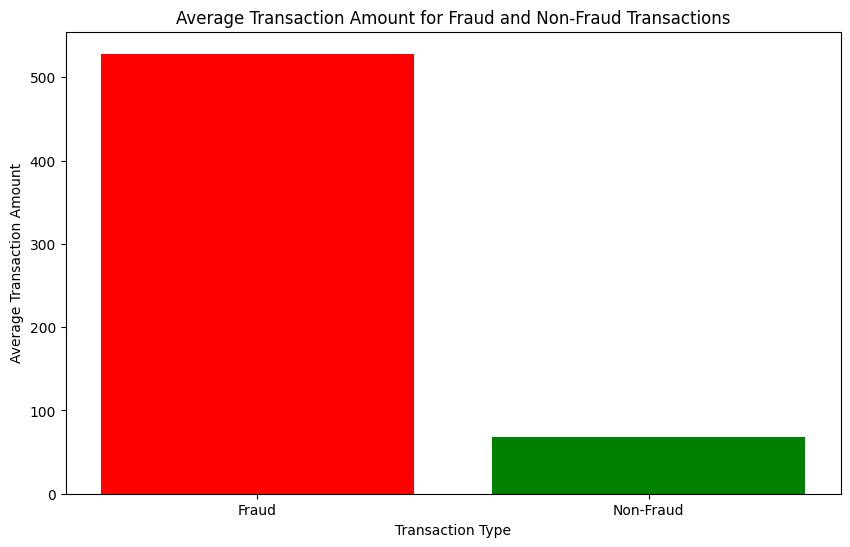

In [455]:
# Tính số tiền giao dịch trung bình cho các giao dịch gian lận và không gian lận
avg_transaction_fraud = data[data['is_fraud'] == 1]['amt'].mean()
avg_transaction_non_fraud = data[data['is_fraud'] == 0]['amt'].mean()

print("Số tiền giao dịch trung bình cho các giao dịch gian lận:", avg_transaction_fraud)
print("Số tiền giao dịch trung bình cho các giao dịch không gian lận:", avg_transaction_non_fraud)

# Tạo DataFrame chứa kết quả
avg_transaction_data = pd.DataFrame({
    'Transaction Type': ['Fraud', 'Non-Fraud'],
    'Average Amount': [avg_transaction_fraud, avg_transaction_non_fraud]
})

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
plt.bar(avg_transaction_data['Transaction Type'], avg_transaction_data['Average Amount'], color=['red', 'green'])
plt.xlabel('Transaction Type')
plt.ylabel('Average Transaction Amount')
plt.title('Average Transaction Amount for Fraud and Non-Fraud Transactions')
plt.show()

In [456]:
columns = ['trans_month', 'trans_dayOfWeek', 'gender', 'category', 'age', 'age_group']
columns_name = ['month', 'day of week', 'gender', 'category', 'age', 'age group']
name = ['Not Fraud', 'Fraud']

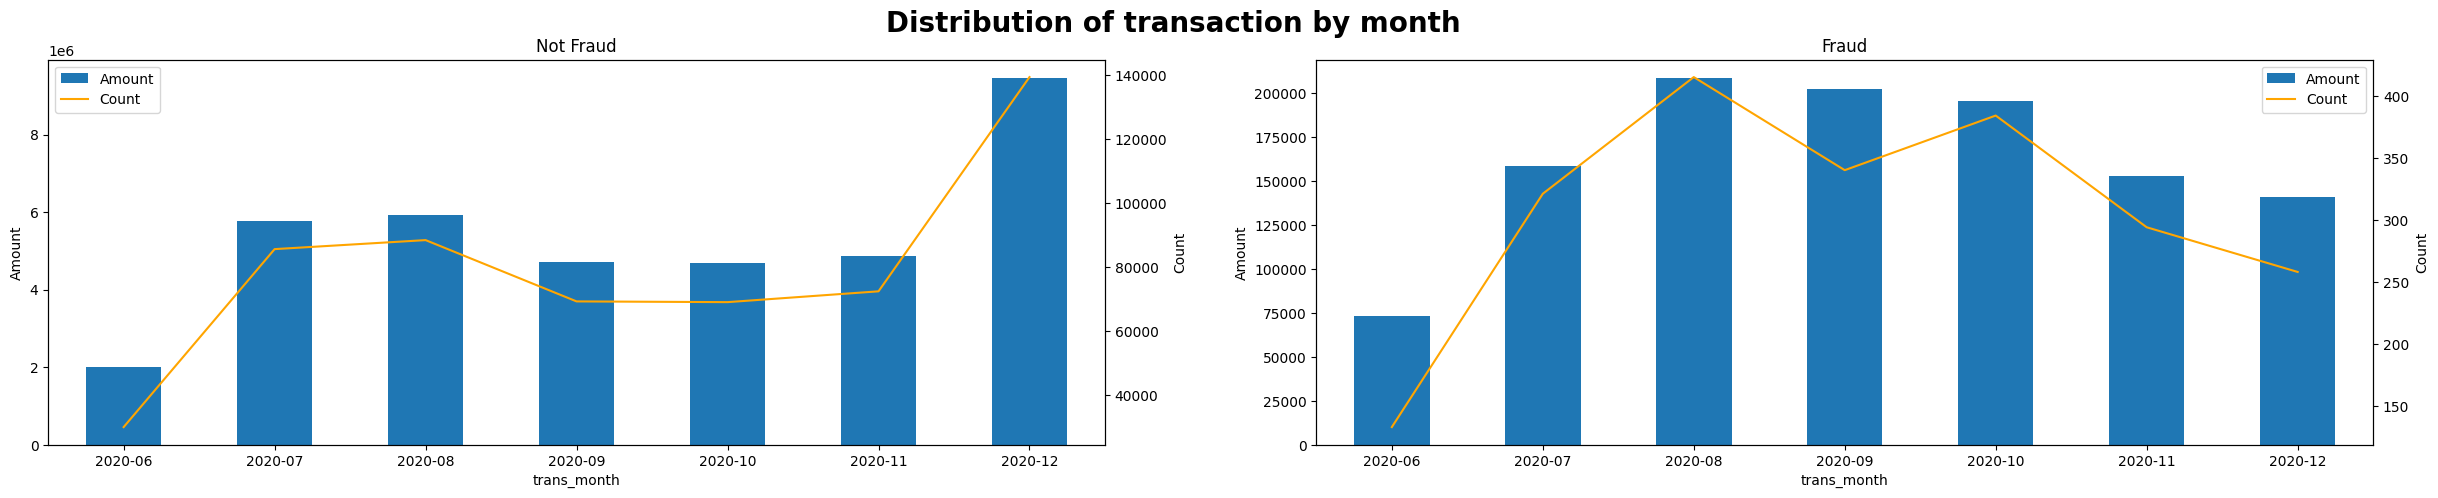

In [457]:
fig = plt.figure(figsize=(30, 5))
plt.suptitle("Distribution of transaction by month", fontsize=20, fontweight='bold')

for i in range(2):
    plt.subplot(1, 2, 1+i)
    df_1 = data[data['is_fraud'] == i]
    
    ax = df_1.groupby('trans_month')['amt'].sum().plot(kind='bar', label='Amount')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    ax.set_ylabel('Amount')

    plt.twinx()
    ax1 = df_1.groupby('trans_month').size().plot(kind='line', color='orange', label='Count')
    ax1.set_xticklabels(ax.get_xticklabels(), rotation=0)
    ax1.set_ylabel('Count')

    chart, labels = ax.get_legend_handles_labels()
    chart1, labels1 = ax1.get_legend_handles_labels()
    ax1.legend(chart + chart1, labels + labels1, loc=0)

    plt.title(name[i])
    plt.xlabel('month')
    
plt.show()


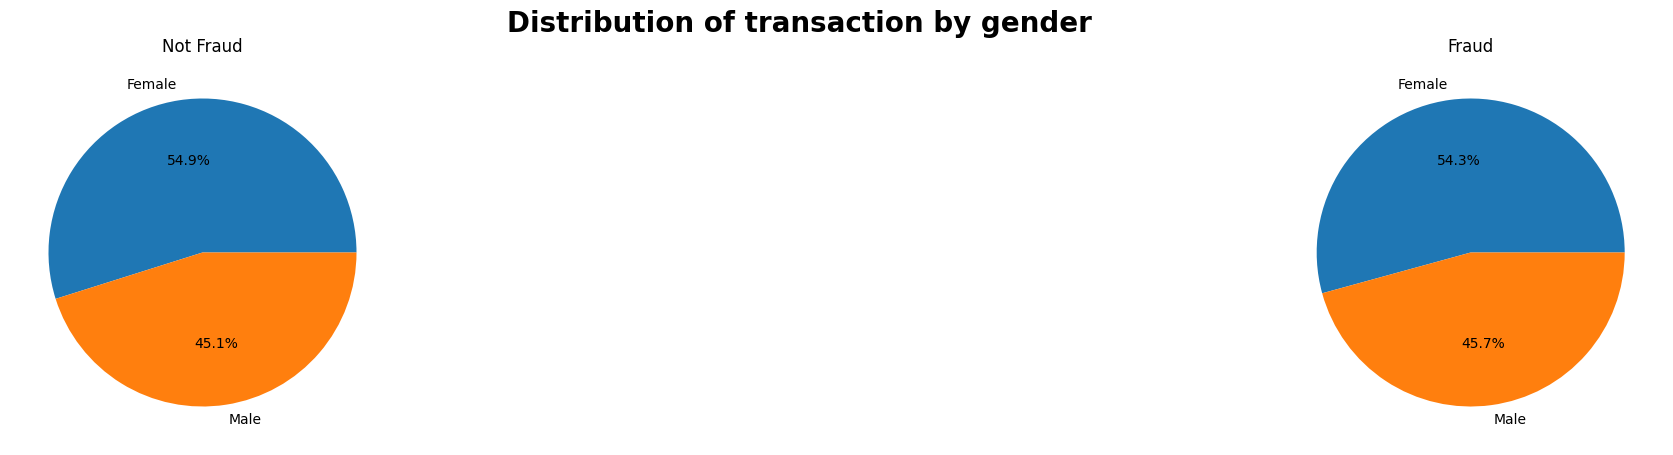

In [458]:
fig = plt.figure(figsize=(30, 5))
plt.suptitle("Distribution of transaction by gender", fontsize=20, fontweight='bold')

for i in range(2):
    plt.subplot(1, 2, 1+i)
    df_1 = data[data['is_fraud'] == i]
    ax = plt.pie(df_1['gender'].value_counts(), labels=['Female', 'Male'], autopct='%1.1f%%')
    plt.title(name[i])

plt.show()


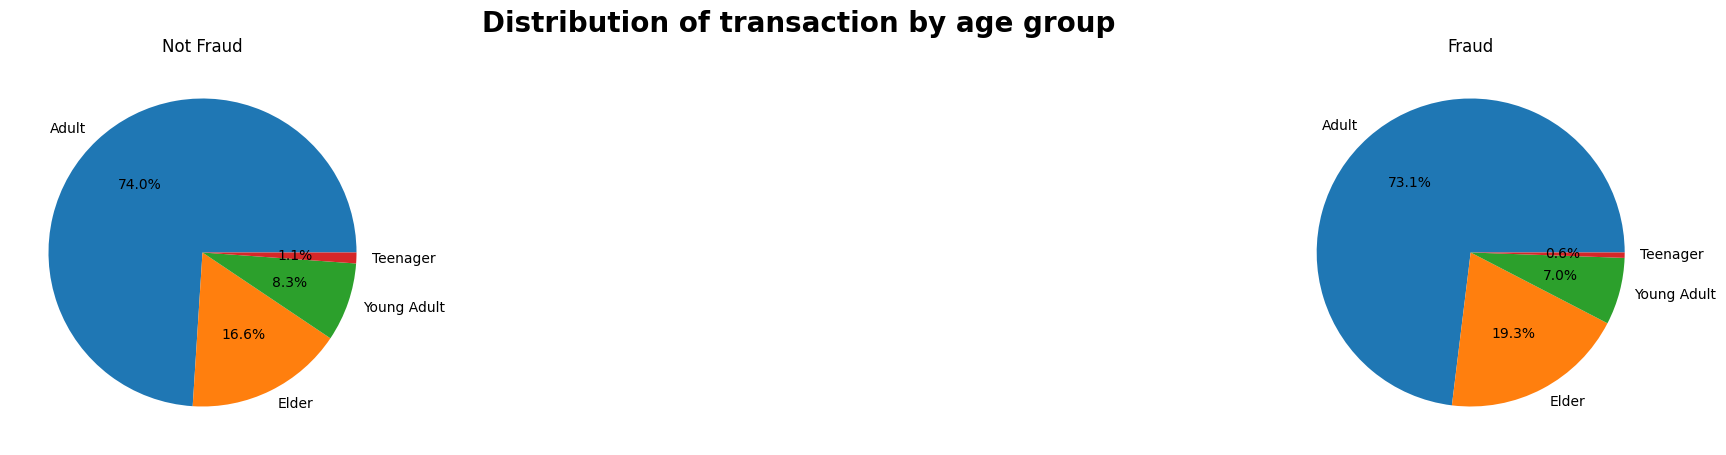

In [459]:
fig = plt.figure(figsize=(30, 5))
plt.suptitle("Distribution of transaction by age group", fontsize=20, fontweight='bold')

for i in range(2):
    plt.subplot(1, 2, 1+i)
    df_1 = data[data['is_fraud'] == i]
    ax = plt.pie(df_1['age_group'].value_counts(), labels=df_1['age_group'].value_counts().index, autopct='%1.1f%%')
    plt.title(name[i])

plt.show()


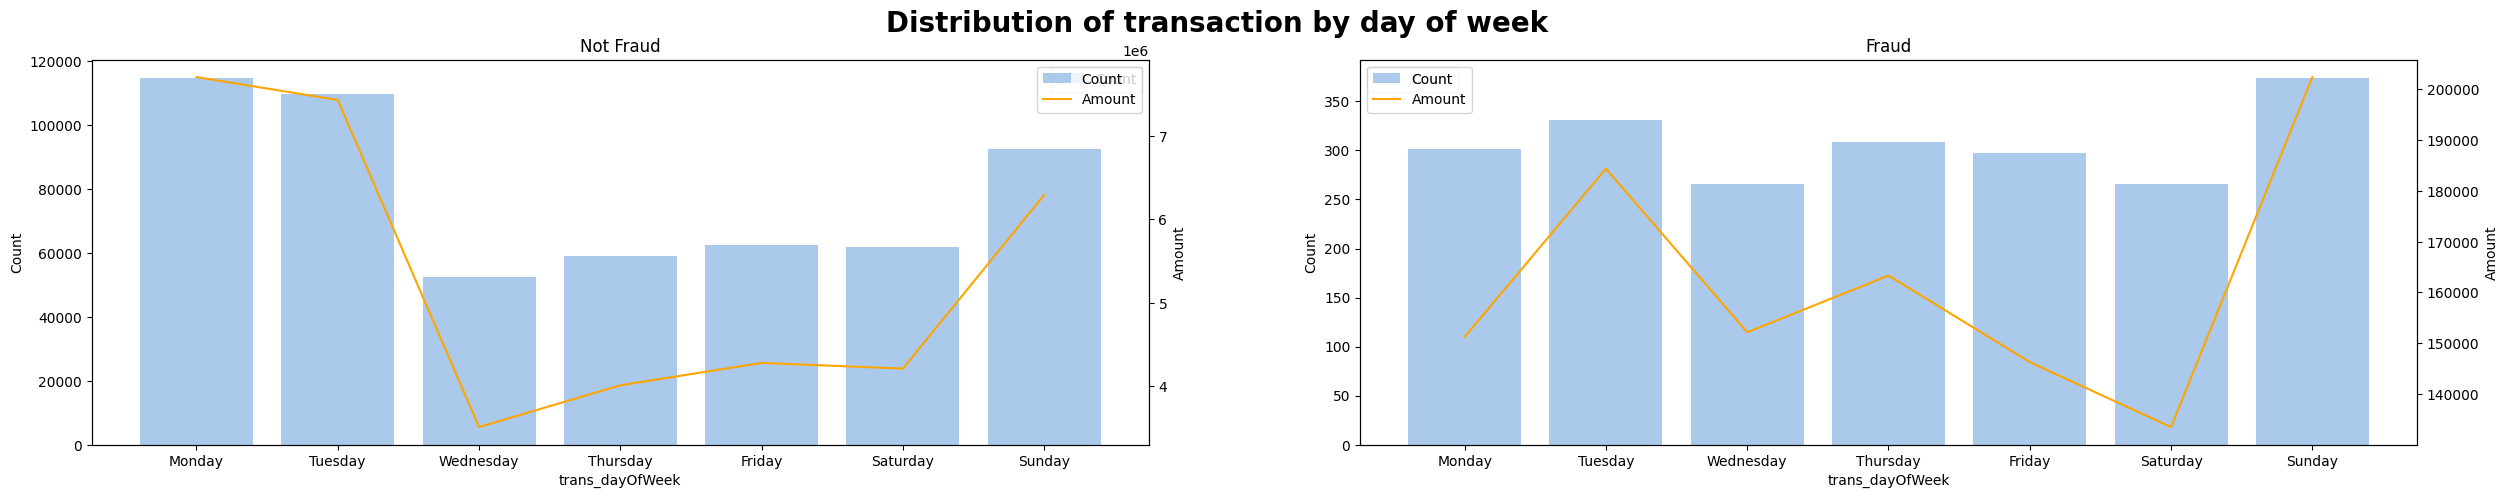

In [460]:
fig = plt.figure(figsize=(30, 5))
plt.suptitle("Distribution of transaction by day of week", fontsize=20, fontweight='bold')

for i in range(2):
    plt.subplot(1, 2, 1+i)
    df_1 = data[data['is_fraud'] == i]
    
    cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    ax = sns.barplot(data=df_1.groupby('trans_dayOfWeek').size().reset_index(), x='trans_dayOfWeek', y=0, label='Count', color='#a1c9f4', order=cats)
    ax.set_ylabel('Count')

    plt.twinx()
    ax1 = sns.lineplot(data=df_1.groupby('trans_dayOfWeek')['amt'].sum().reindex(cats).reset_index(), x='trans_dayOfWeek', y='amt', label='Amount', color='orange')
    ax1.set_ylabel('Amount')

    chart, labels = ax.get_legend_handles_labels()
    chart1, labels1 = ax1.get_legend_handles_labels()
    ax1.legend(chart + chart1, labels + labels1, loc=0)

    plt.title(name[i])
    plt.xlabel('day of week')

plt.show()


C:\Users\PC\AppData\Local\Temp\ipykernel_18868\2410071084.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
C:\Users\PC\AppData\Local\Temp\ipykernel_18868\2410071084.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


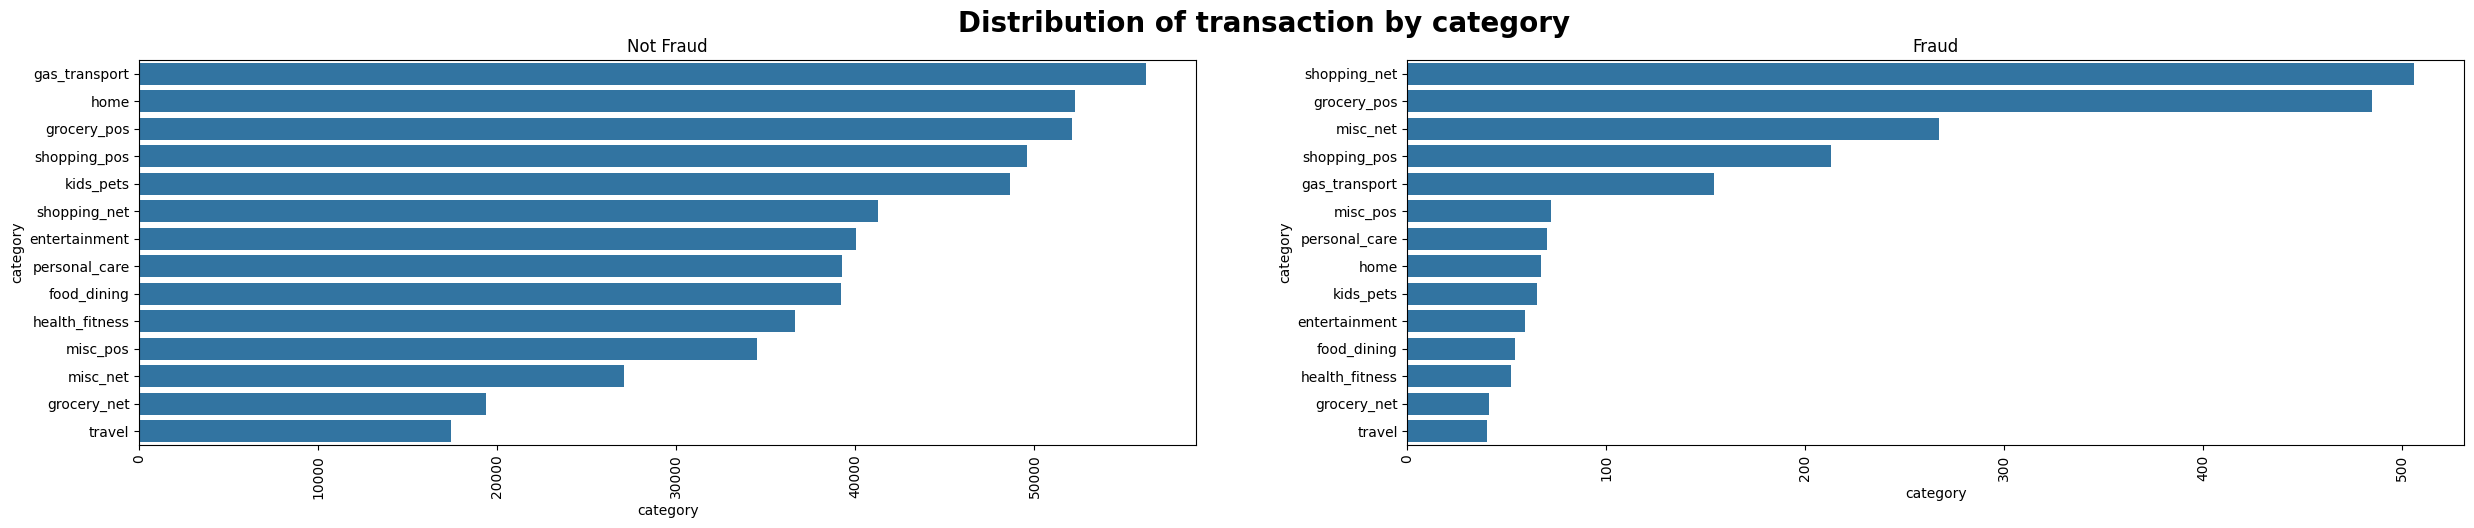

In [461]:
fig = plt.figure(figsize=(30, 5))
plt.suptitle("Distribution of transaction by category", fontsize=20, fontweight='bold')

for i in range(2):
    plt.subplot(1, 2, 1+i)
    df_1 = data[data['is_fraud'] == i]
    ax = sns.countplot(data=df_1, y='category', order=df_1['category'].value_counts().index)
    plt.title(name[i])
    plt.xlabel('category')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.show()


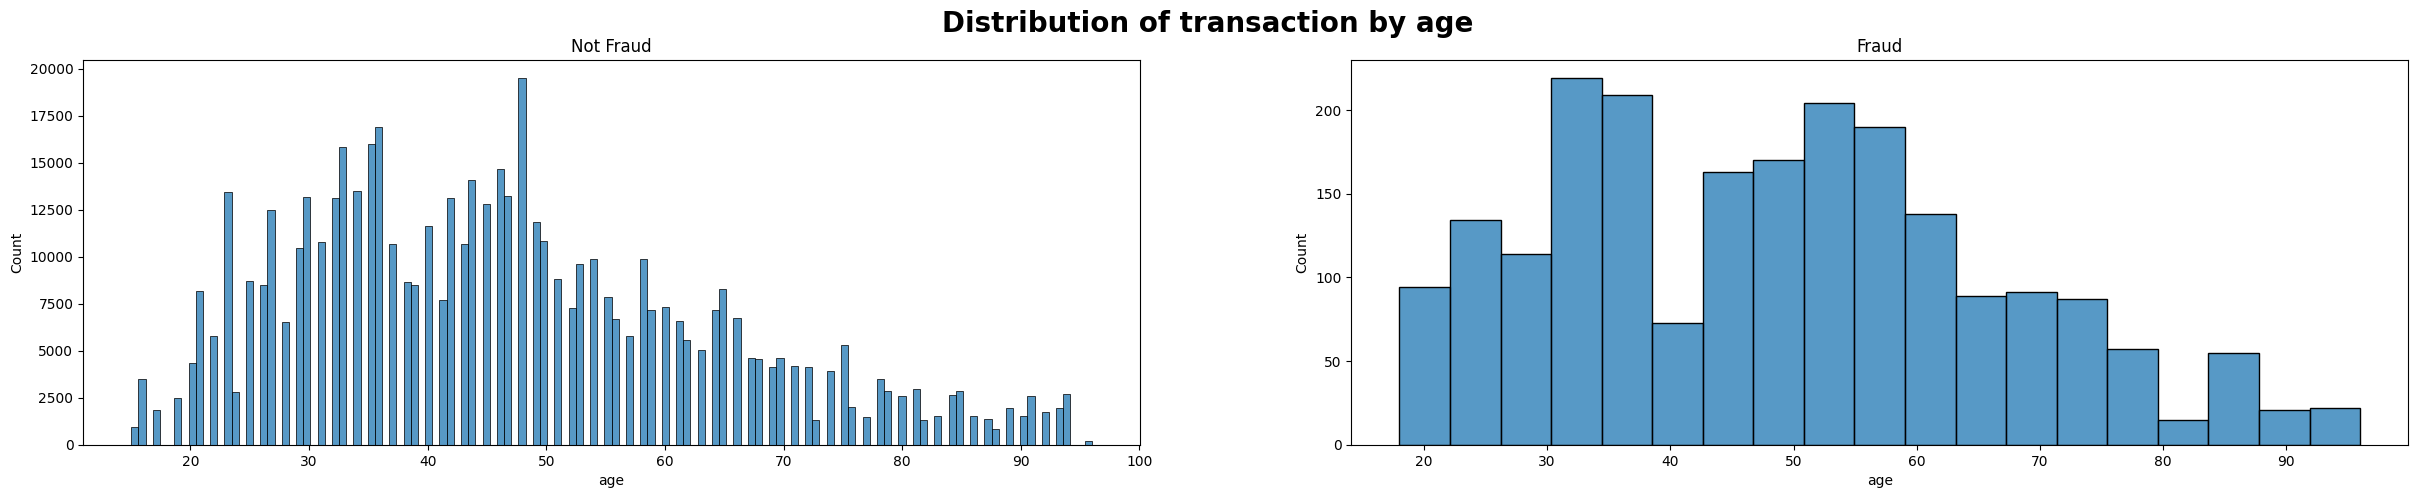

In [462]:
fig = plt.figure(figsize=(30, 5))
plt.suptitle("Distribution of transaction by age", fontsize=20, fontweight='bold')

for i in range(2):
    plt.subplot(1, 2, 1+i)
    df_1 = data[data['is_fraud'] == i]
    ax = sns.histplot(data=df_1, x='age')
    plt.title(name[i])
    plt.xlabel('age')

plt.show()


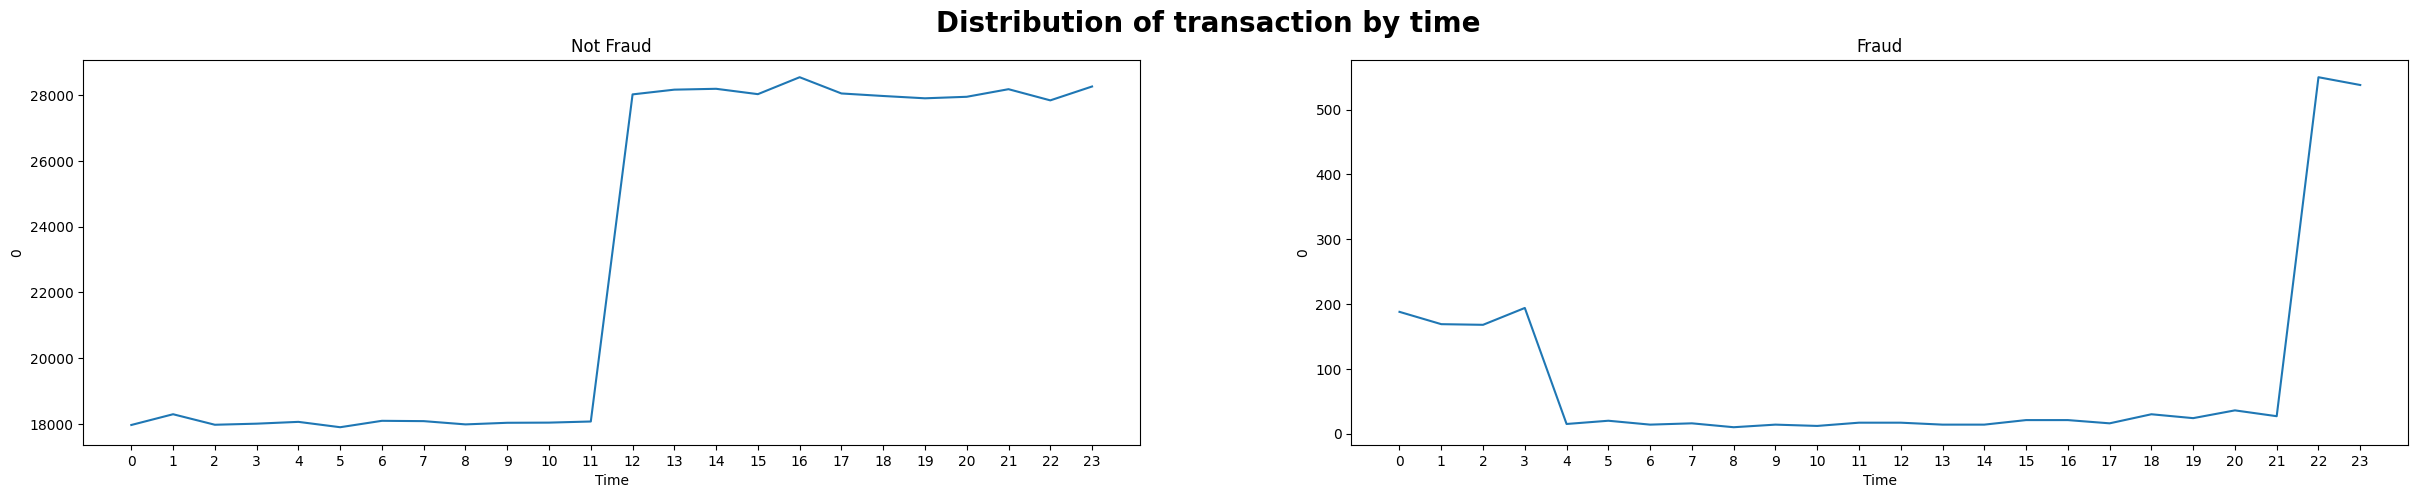

In [463]:
# Gán tên cho các loại giao dịch
name = ['Not Fraud', 'Fraud']

# Khởi tạo khung hình và tiêu đề cho biểu đồ
fig = plt.figure(figsize=(30, 5))
plt.suptitle("Distribution of transaction by time", fontsize=20, fontweight='bold')

# Vẽ biểu đồ cho từng loại giao dịch
for i in range(0, 2):
    plt.subplot(1, 2, 1 + i)
    temp = data[data['is_fraud'] == i].groupby('trans_time_group').size().reset_index().sort_values(by='trans_time_group')
    ax = sns.lineplot(data=temp, x="trans_time_group", y=0)
    plt.title(name[i])
    plt.xlabel('Time')
    ax.set(xticks=data['trans_time_group'].unique())

plt.show()

Từ 0h-11h, số lượng giao dịch duy trì ở mức ổn định \ Từ 11h - 24h là khoảng thời gian người dân tích cực thực hiện giao dịch, tăng vọt so với thời gian trước. \ Đối với giao dịch gian lận, phần lớn các trường hợp xảy ra vào đêm khuya (22-24h) hoặc đầu ngày (0-4h), điều này hàm ý những người có ý đồ xấu sẽ dễ hành động vào thời điểm ít có sự giám sát của con người.

C:\Users\PC\AppData\Local\Temp\ipykernel_18868\859576837.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_jobs.values, y=top_10_jobs.index, palette="viridis")
C:\Users\PC\AppData\Local\Temp\ipykernel_18868\859576837.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_jobs.values, y=top_10_jobs.index, palette="viridis")


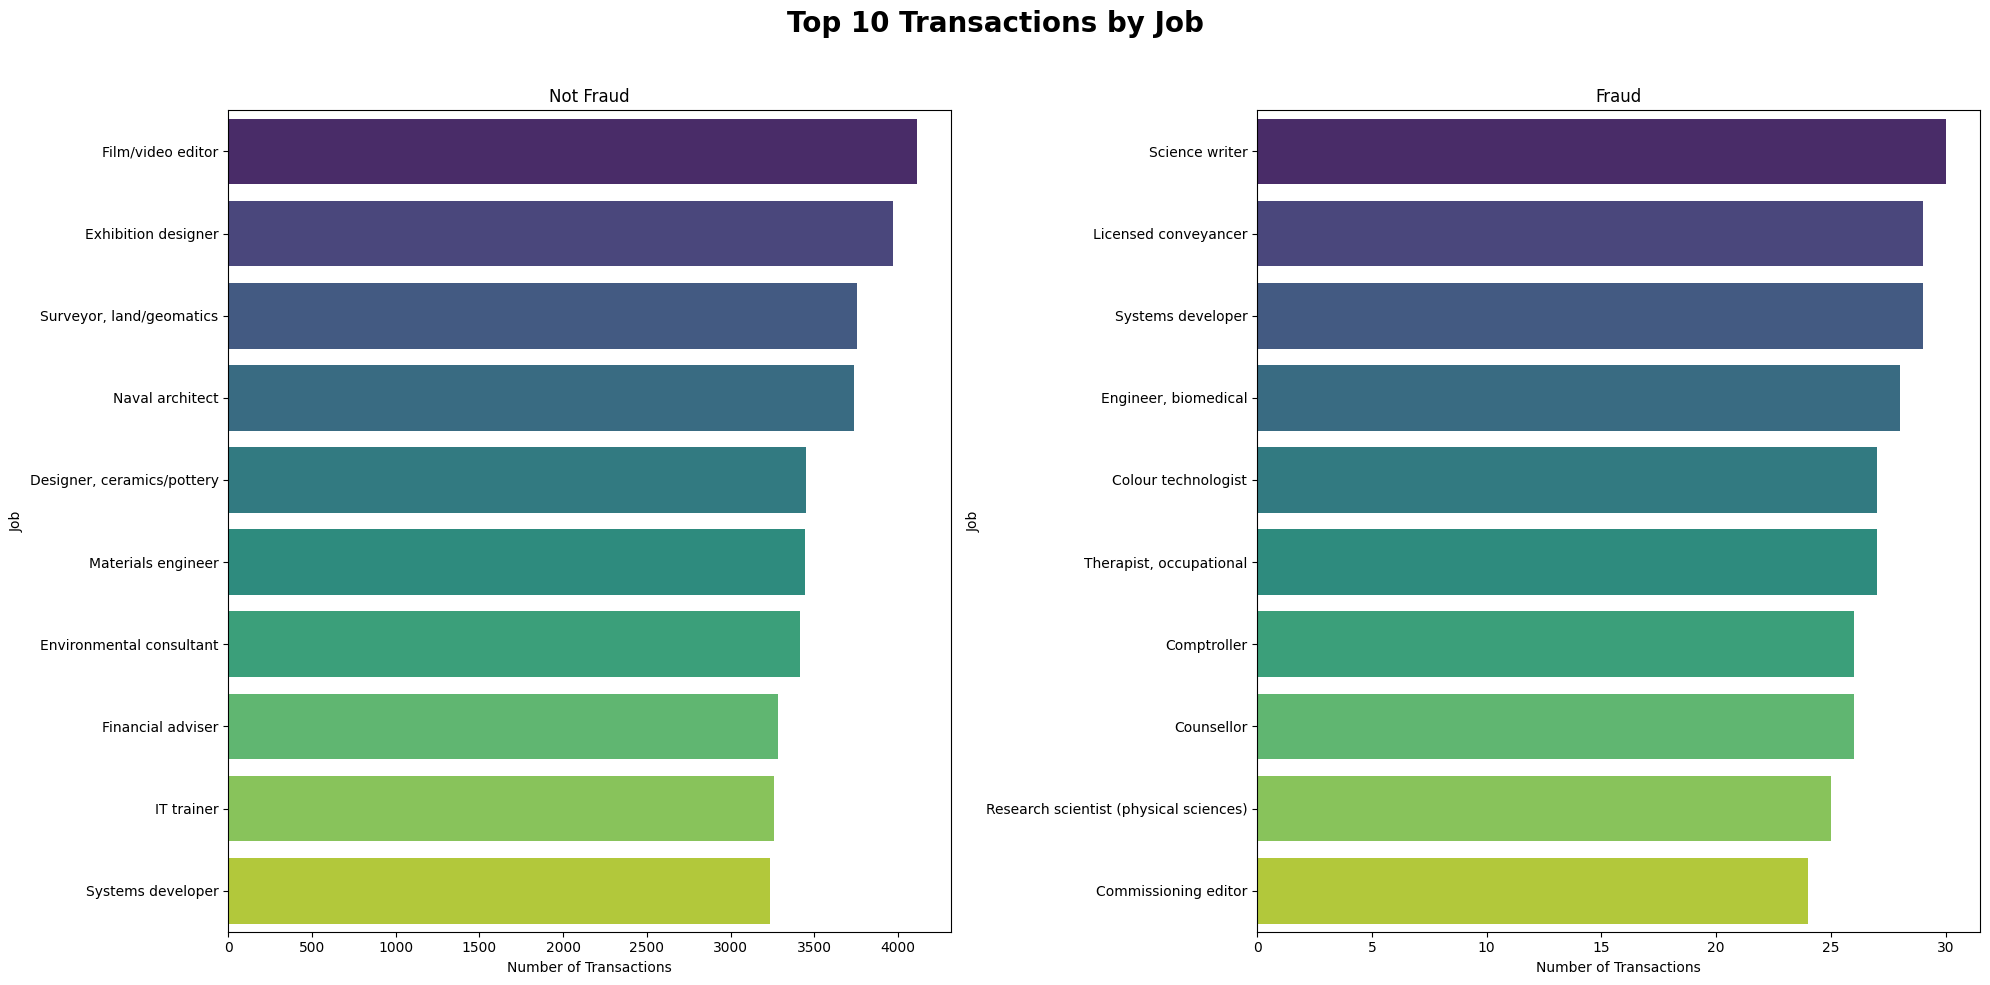

In [464]:
labels = ['Not Fraud', 'Fraud']

# Khởi tạo khung hình và tiêu đề cho biểu đồ
plt.figure(figsize=(20, 10))
plt.suptitle("Top 10 Transactions by Job", fontsize=20, fontweight='bold')

# Lặp qua từng loại giao dịch và vẽ biểu đồ
for i in range(2):
    plt.subplot(1, 2, i + 1)
    subset = data[data['is_fraud'] == i]
    top_10_jobs = subset['job'].value_counts().head(10)
    
    # Vẽ biểu đồ thanh cho top 10 jobs
    sns.barplot(x=top_10_jobs.values, y=top_10_jobs.index, palette="viridis")
    plt.title(labels[i])
    plt.xlabel('Number of Transactions')
    plt.ylabel('Job')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

C:\Users\PC\AppData\Local\Temp\ipykernel_18868\3469181517.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_states.values, y=top_10_states.index, palette="viridis")
C:\Users\PC\AppData\Local\Temp\ipykernel_18868\3469181517.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_states.values, y=top_10_states.index, palette="viridis")


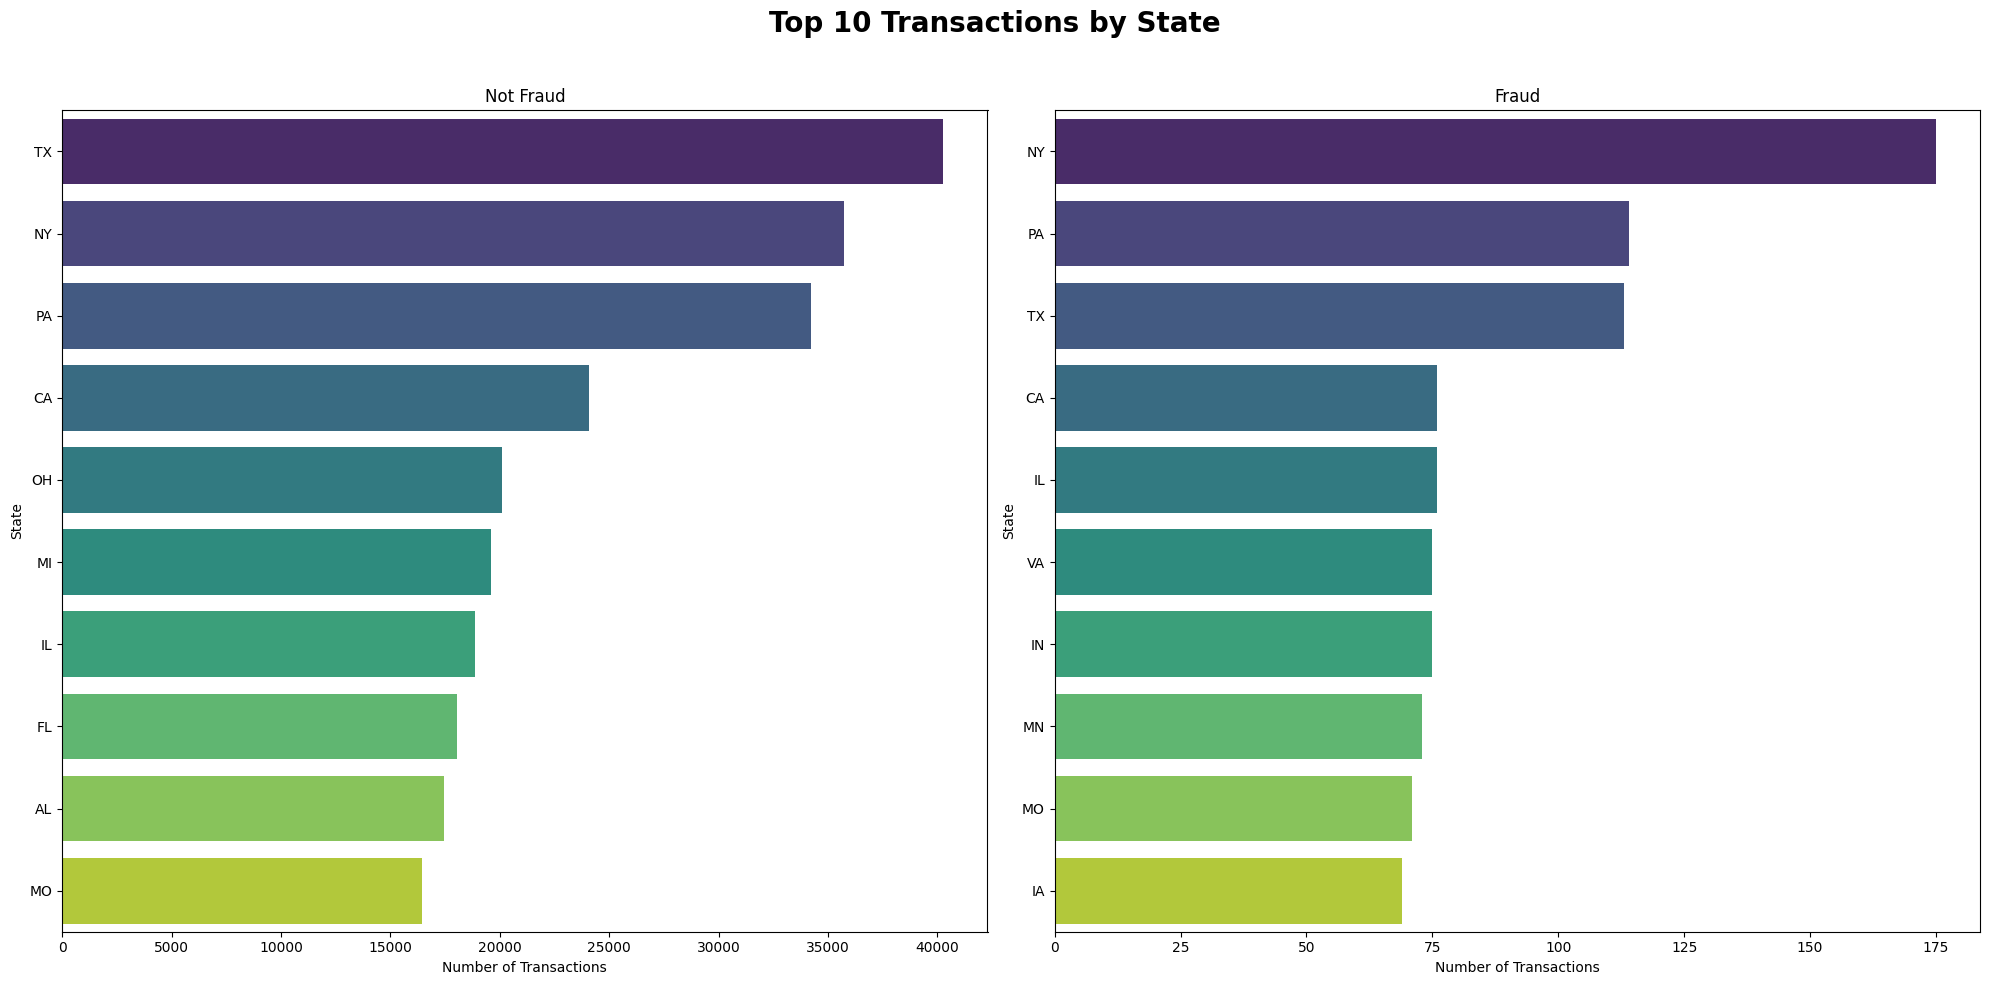

In [465]:
# Khởi tạo khung hình và tiêu đề cho biểu đồ
plt.figure(figsize=(20, 10))
plt.suptitle("Top 10 Transactions by State", fontsize=20, fontweight='bold')

# Lặp qua từng loại giao dịch và vẽ biểu đồ
for i in range(2):
    plt.subplot(1, 2, i + 1)
    subset = data[data['is_fraud'] == i]
    top_10_states = subset['state'].value_counts().head(10)
    
    # Vẽ biểu đồ thanh cho top 10 states
    sns.barplot(x=top_10_states.values, y=top_10_states.index, palette="viridis")
    plt.title(labels[i])
    plt.xlabel('Number of Transactions')
    plt.ylabel('State')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


C:\Users\PC\AppData\Local\Temp\ipykernel_18868\4078473668.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_cities.values, y=top_10_cities.index, palette="viridis")
C:\Users\PC\AppData\Local\Temp\ipykernel_18868\4078473668.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_cities.values, y=top_10_cities.index, palette="viridis")


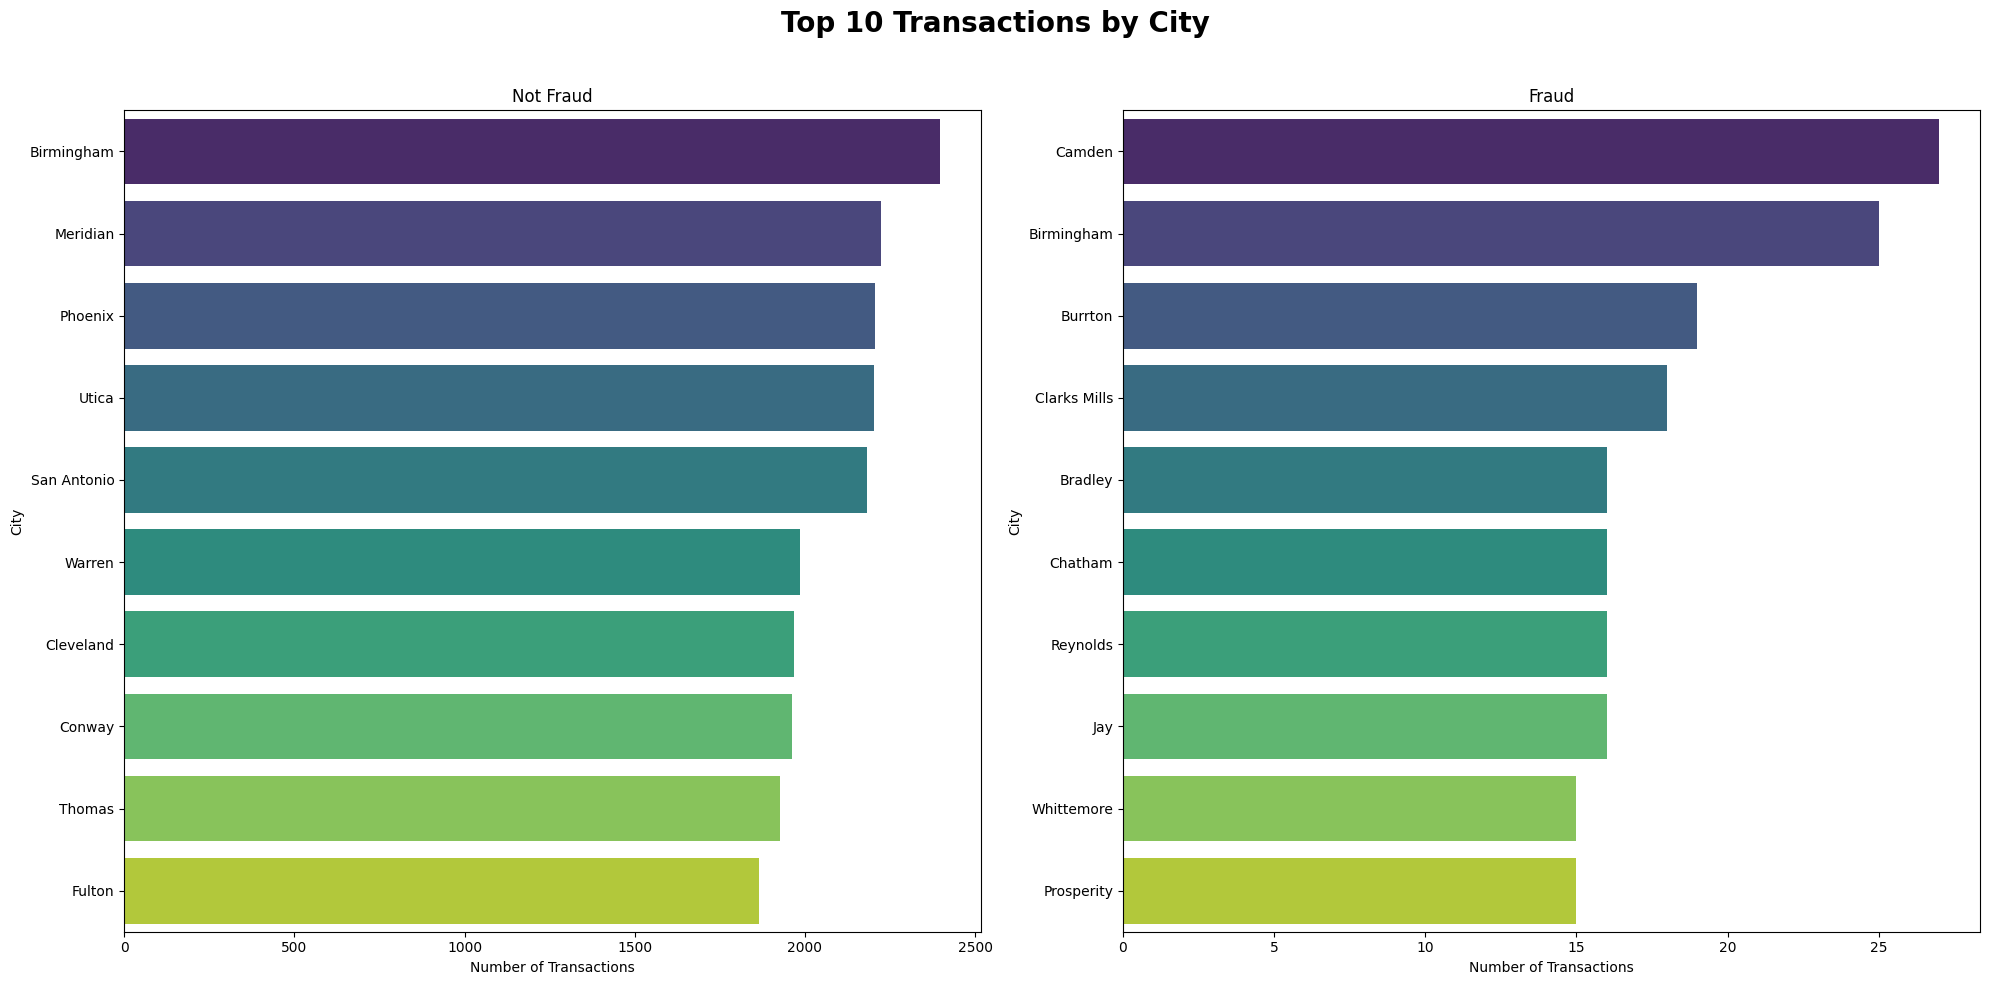

In [466]:
# Khởi tạo khung hình và tiêu đề cho biểu đồ
plt.figure(figsize=(20, 10))
plt.suptitle("Top 10 Transactions by City", fontsize=20, fontweight='bold')

# Lặp qua từng loại giao dịch và vẽ biểu đồ
for i in range(2):
    plt.subplot(1, 2, i + 1)
    subset = data[data['is_fraud'] == i]
    top_10_cities = subset['city'].value_counts().head(10)
    
    # Vẽ biểu đồ thanh cho top 10 cities
    sns.barplot(x=top_10_cities.values, y=top_10_cities.index, palette="viridis")
    plt.title(labels[i])
    plt.xlabel('Number of Transactions')
    plt.ylabel('City')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [467]:
print(top_10_cities)

city
Camden          27
Birmingham      25
Burrton         19
Clarks Mills    18
Bradley         16
Chatham         16
Reynolds        16
Jay             16
Whittemore      15
Prosperity      15
Name: count, dtype: int64


C:\Users\PC\AppData\Local\Temp\ipykernel_18868\379258097.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_merchants.values, y=top_10_merchants.index, palette="viridis")
C:\Users\PC\AppData\Local\Temp\ipykernel_18868\379258097.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_merchants.values, y=top_10_merchants.index, palette="viridis")


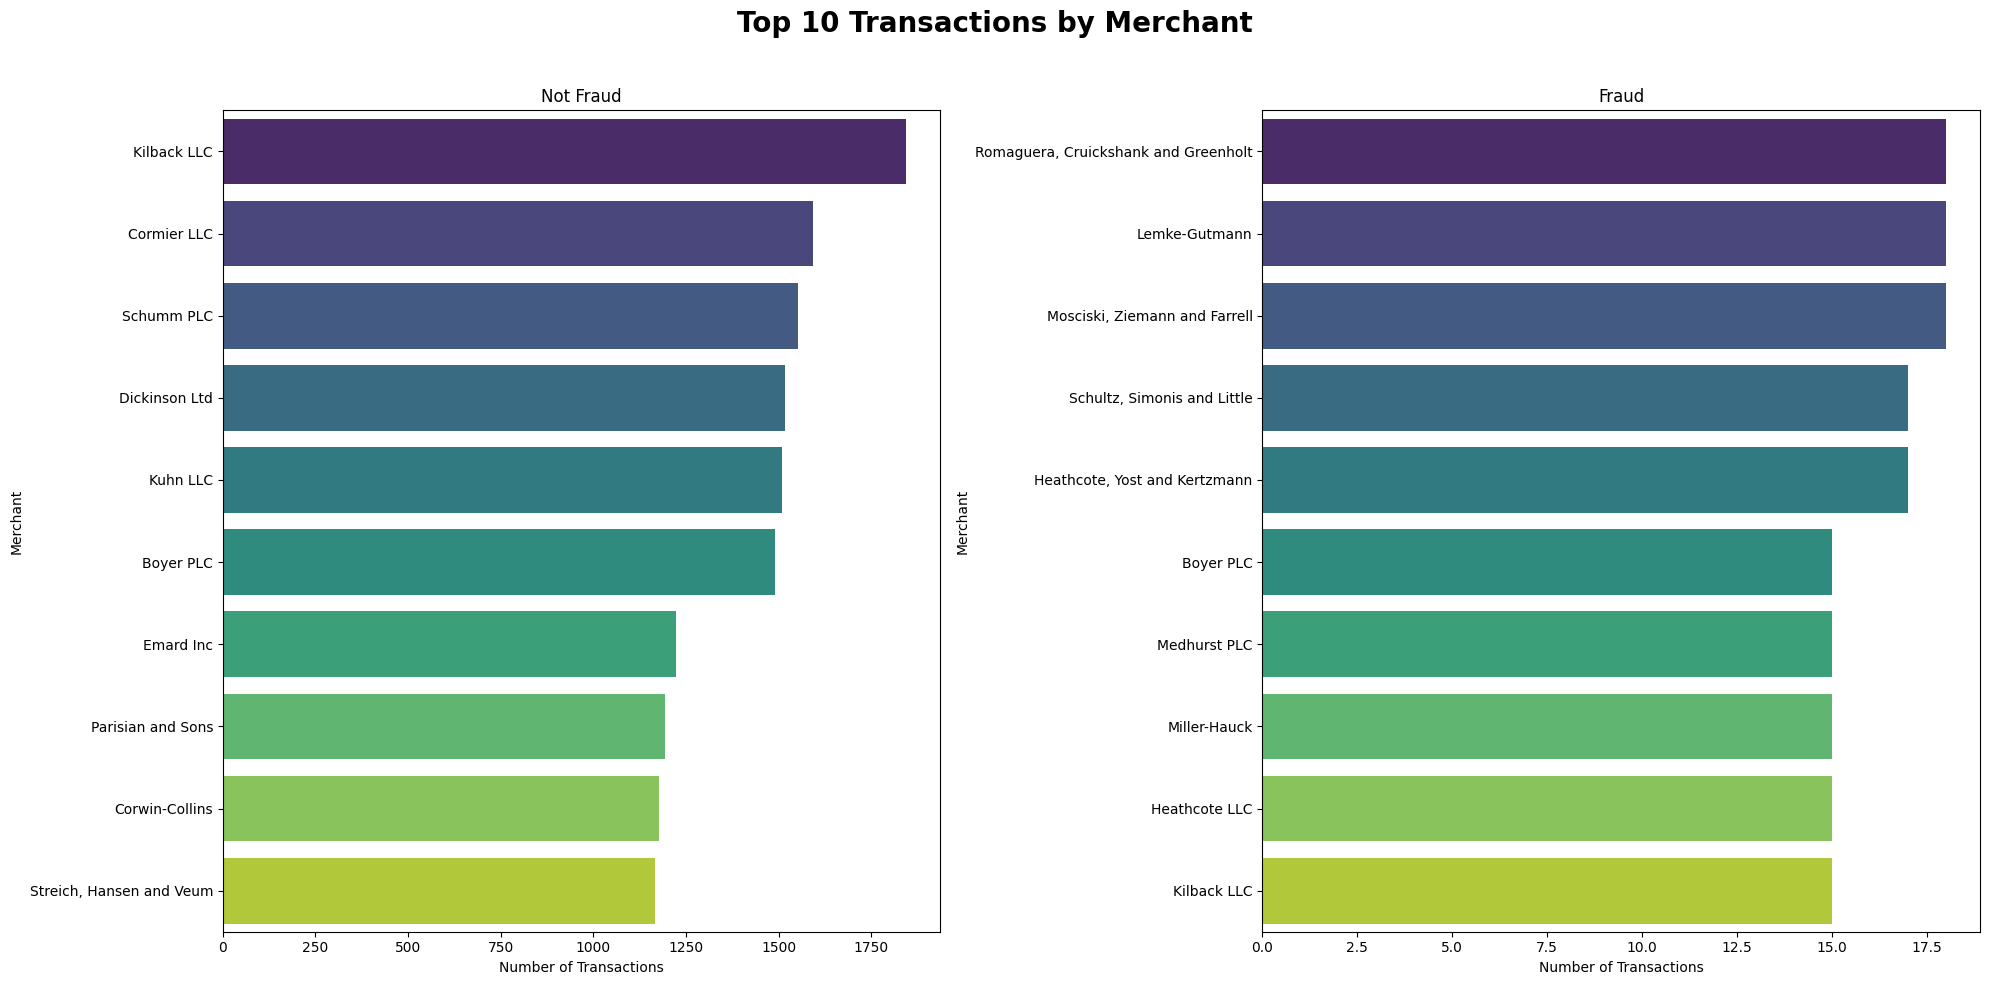

In [468]:
# Khởi tạo khung hình và tiêu đề cho biểu đồ
plt.figure(figsize=(20, 10))
plt.suptitle("Top 10 Transactions by Merchant", fontsize=20, fontweight='bold')

# Lặp qua từng loại giao dịch và vẽ biểu đồ
for i in range(2):
    plt.subplot(1, 2, i + 1)
    subset = data[data['is_fraud'] == i]
    top_10_merchants = subset['merchant'].value_counts().head(10)
    
    # Vẽ biểu đồ thanh cho top 10 merchants
    sns.barplot(x=top_10_merchants.values, y=top_10_merchants.index, palette="viridis")
    plt.title(labels[i])
    plt.xlabel('Number of Transactions')
    plt.ylabel('Merchant')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [469]:
print(top_10_merchants)

merchant
Romaguera, Cruickshank and Greenholt    18
Lemke-Gutmann                           18
Mosciski, Ziemann and Farrell           18
Schultz, Simonis and Little             17
Heathcote, Yost and Kertzmann           17
Boyer PLC                               15
Medhurst PLC                            15
Miller-Hauck                            15
Heathcote LLC                           15
Kilback LLC                             15
Name: count, dtype: int64


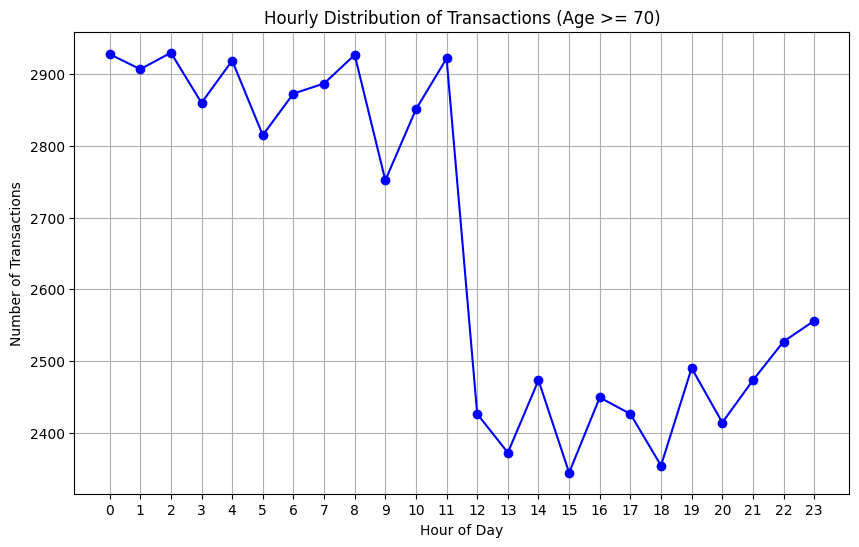

In [470]:
transactions_over_70 = data[data['age'] >= 70]

# Tạo một Series để đếm số lượng giao dịch theo cung giờ
hourly_counts = transactions_over_70['trans_time_group'].value_counts().sort_index()

# Vẽ biểu đồ đường
plt.figure(figsize=(10, 6))
plt.plot(hourly_counts.index, hourly_counts.values, marker='o', linestyle='-', color='b')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Transactions')
plt.title('Hourly Distribution of Transactions (Age >= 70)')
plt.xticks(hourly_counts.index)
plt.grid(True)
plt.show()

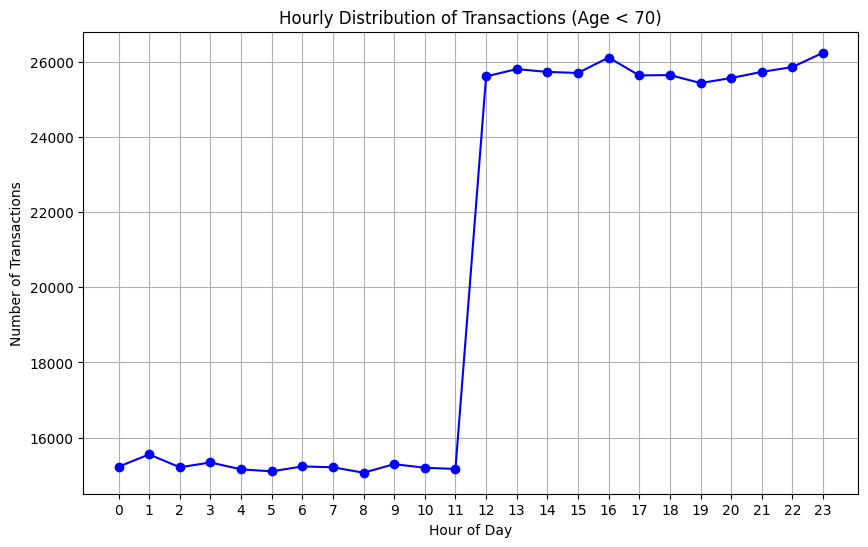

In [471]:
transactions_over_70 = data[data['age'] < 70]

# Tạo một Series để đếm số lượng giao dịch theo cung giờ
hourly_counts = transactions_over_70['trans_time_group'].value_counts().sort_index()

# Vẽ biểu đồ đường
plt.figure(figsize=(10, 6))
plt.plot(hourly_counts.index, hourly_counts.values, marker='o', linestyle='-', color='b')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Transactions')
plt.title('Hourly Distribution of Transactions (Age < 70)')
plt.xticks(hourly_counts.index)
plt.grid(True)
plt.show()

In [472]:
data.drop(columns=['trans_date','trans_time','age_group'],inplace=True)
data.head()

,trans_date_trans_time,cc_num,merchant,category,amt,gender,city,state,job,is_fraud,trans_time_group,trans_month,trans_dayOfWeek,age
0,2020-06-21 12:14:00,2.291160e+15,Kirlin and Sons,personal_care,2.86,M,Columbia,SC,Mechanical engineer,0,12,2020-06,Sunday,52
1,2020-06-21 12:14:00,3.573030e+15,Sporer-Keebler,personal_care,29.84,F,Altonah,UT,"Sales professional, IT",0,12,2020-06,Sunday,30
2,2020-06-21 12:14:00,3.598220e+15,"Swaniawski, Nitzsche and Welch",health_fitness,41.28,F,Bellmore,NY,"Librarian, public",0,12,2020-06,Sunday,50
3,2020-06-21 12:15:00,3.591920e+15,Haley Group,misc_pos,60.05,M,Titusville,FL,Set designer,0,12,2020-06,Sunday,33
4,2020-06-21 12:15:00,3.526830e+15,Johnston-Casper,travel,3.19,M,Falmouth,MI,Furniture designer,0,12,2020-06,Sunday,65


In [473]:
df = data.copy()

le = LabelEncoder()
for columns in df.columns:
    if df[columns].dtype == 'object':
        df[columns] = le.fit_transform(df[columns])

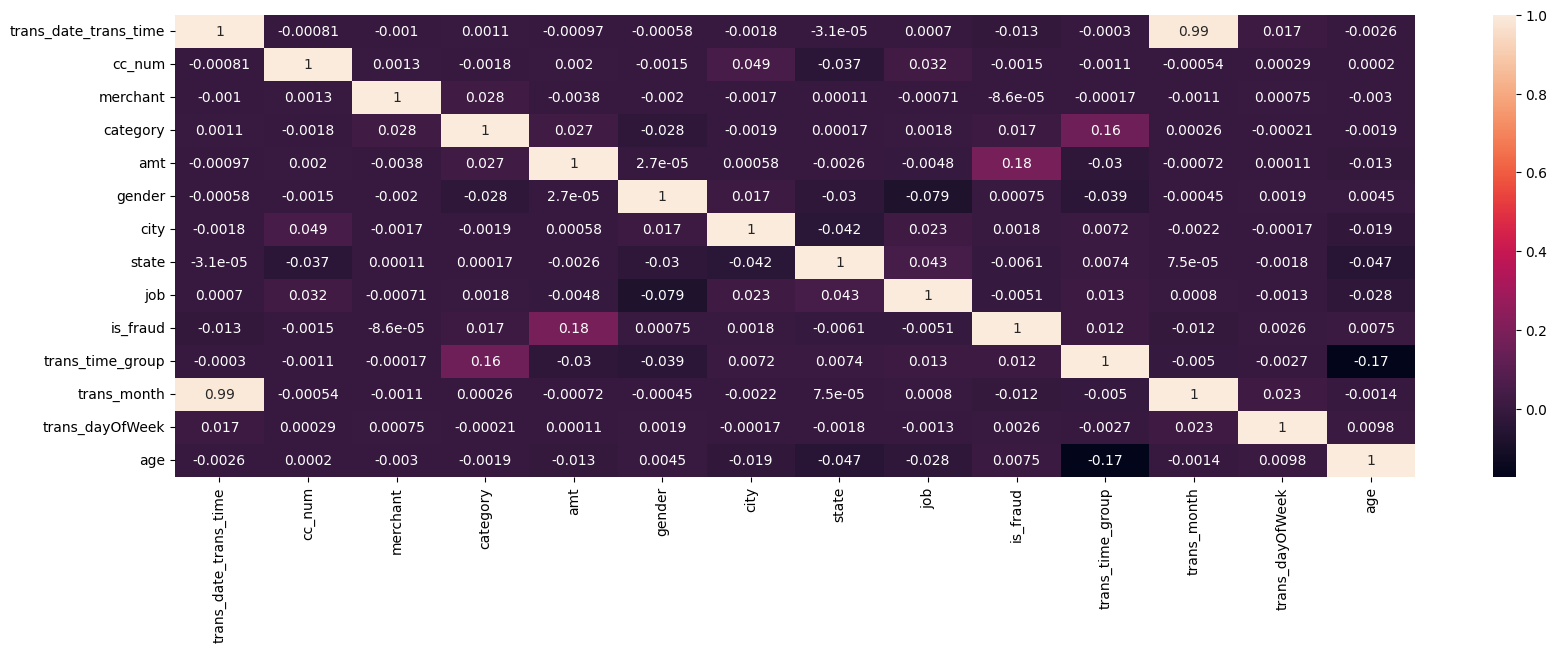

In [474]:
plt.figure(figsize=(20,6))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [475]:
data.head()

,trans_date_trans_time,cc_num,merchant,category,amt,gender,city,state,job,is_fraud,trans_time_group,trans_month,trans_dayOfWeek,age
0,2020-06-21 12:14:00,2.291160e+15,Kirlin and Sons,personal_care,2.86,M,Columbia,SC,Mechanical engineer,0,12,2020-06,Sunday,52
1,2020-06-21 12:14:00,3.573030e+15,Sporer-Keebler,personal_care,29.84,F,Altonah,UT,"Sales professional, IT",0,12,2020-06,Sunday,30
2,2020-06-21 12:14:00,3.598220e+15,"Swaniawski, Nitzsche and Welch",health_fitness,41.28,F,Bellmore,NY,"Librarian, public",0,12,2020-06,Sunday,50
3,2020-06-21 12:15:00,3.591920e+15,Haley Group,misc_pos,60.05,M,Titusville,FL,Set designer,0,12,2020-06,Sunday,33
4,2020-06-21 12:15:00,3.526830e+15,Johnston-Casper,travel,3.19,M,Falmouth,MI,Furniture designer,0,12,2020-06,Sunday,65


In [476]:
data.drop(columns=['trans_date_trans_time','trans_month','trans_dayOfWeek'], inplace=True)

In [477]:
# Chuyển đổi các cột boolean thành số nhị phân (0, 1)
data_dummy = pd.get_dummies(data)

# Nếu các cột job_* là kiểu boolean, chuyển chúng thành 0 và 1
boolean_columns = data_dummy.select_dtypes(include=['bool']).columns
data_dummy[boolean_columns] = data_dummy[boolean_columns].astype(int)

# Kiểm tra DataFrame sau khi đã chuyển đổi
print(data_dummy.head())

         cc_num    amt  is_fraud  trans_time_group  age  \
0  2.291160e+15   2.86         0                12   52   
1  3.573030e+15  29.84         0                12   30   
2  3.598220e+15  41.28         0                12   50   
3  3.591920e+15  60.05         0                12   33   
4  3.526830e+15   3.19         0                12   65   

   merchant_Abbott-Rogahn  merchant_Abbott-Steuber  \
0                       0                        0   
1                       0                        0   
2                       0                        0   
3                       0                        0   
4                       0                        0   

   merchant_Abernathy and Sons  merchant_Abshire PLC  \
0                            0                     0   
1                            0                     0   
2                            0                     0   
3                            0                     0   
4                            0          

In [478]:
df0 = data[data.is_fraud==0]
df1 = data[data.is_fraud==1]
df0.shape,df1.shape

((553574, 11), (2145, 11))

In [479]:
df0_rus = df0.sample(df1.shape[0])
df0_rus.shape

(2145, 11)

In [480]:
data_random_under = pd.concat([df0_rus,df1])
data_random_under.shape

(4290, 11)

In [481]:
df = data_random_under.copy()

le = LabelEncoder()
for columns in df.columns:
    if df[columns].dtype == 'object':
        df[columns] = le.fit_transform(df[columns])

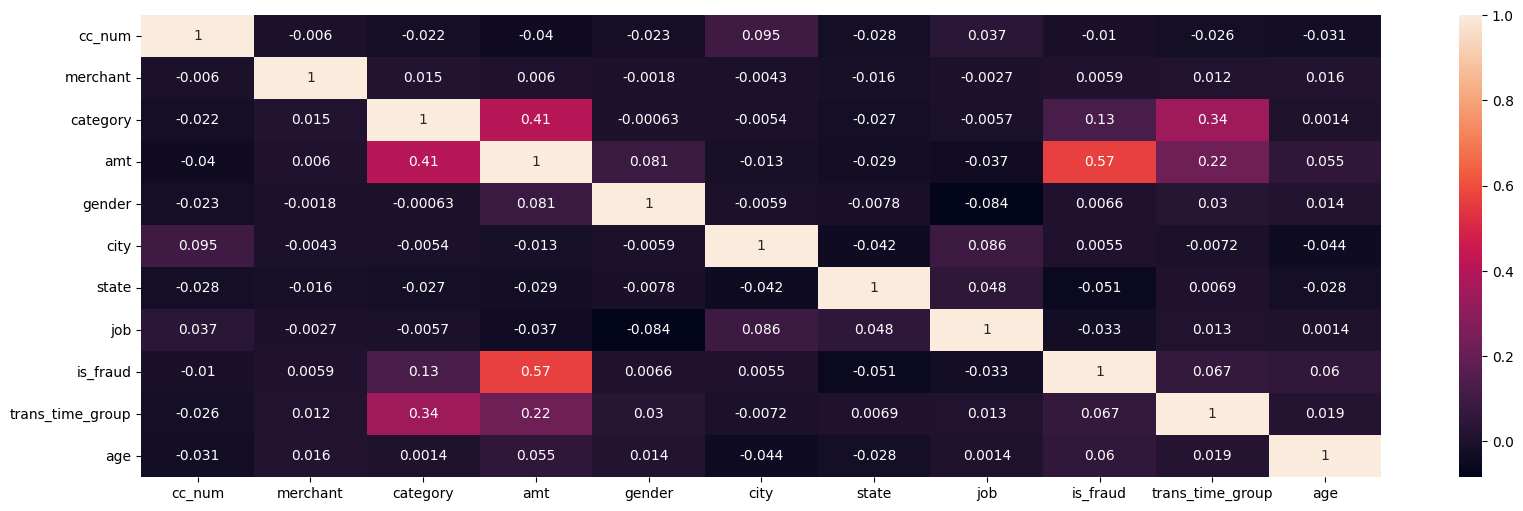

In [482]:
plt.figure(figsize=(20,6))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [483]:
# Chuyển đổi các cột boolean thành số nhị phân (0, 1)
data_dummy = pd.get_dummies(data_random_under)

# Nếu các cột job_* là kiểu boolean, chuyển chúng thành 0 và 1
boolean_columns = data_dummy.select_dtypes(include=['bool']).columns
data_dummy[boolean_columns] = data_dummy[boolean_columns].astype(int)

# Kiểm tra DataFrame sau khi đã chuyển đổi
print(data_dummy.head())

              cc_num     amt  is_fraud  trans_time_group  age  \
55876   4.783230e+12   14.29         0                19   59   
401617  4.306590e+15   29.28         0                23   61   
264960  3.409510e+14  470.32         0                13   49   
229227  3.529600e+15    9.00         0                17   35   
414293  4.181830e+18    2.72         0                18   32   

        merchant_Abbott-Rogahn  merchant_Abbott-Steuber  \
55876                        0                        0   
401617                       0                        0   
264960                       0                        0   
229227                       0                        0   
414293                       0                        0   

        merchant_Abernathy and Sons  merchant_Abshire PLC  \
55876                             0                     0   
401617                            0                     0   
264960                            0                     0   
229227    

In [484]:
X = data_dummy.drop('is_fraud', axis=1)
y = data_dummy['is_fraud']

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Chuẩn hóa dữ liệu
scaler = MinMaxScaler()  
scaler.fit(X_train[["cc_num","age", "amt", "trans_time_group"]])
X_train[["cc_num","age", "amt", "trans_time_group"]] = scaler.transform(X_train[["cc_num","age", "amt", "trans_time_group"]])
X_test[["cc_num","age", "amt", "trans_time_group"]] = scaler.transform(X_test[["cc_num","age", "amt", "trans_time_group"]])

In [485]:
def print_scores(y_true, y_pred):
    print(classification_report(y_true, y_pred))

In [486]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print_scores(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.87      0.83      0.85       660
           1       0.83      0.87      0.85       627

    accuracy                           0.85      1287
   macro avg       0.85      0.85      0.85      1287
weighted avg       0.85      0.85      0.85      1287



In [487]:
#random Forest
from sklearn.ensemble import RandomForestClassifier

#khoi tao model random forest 
model_RFC = RandomForestClassifier(n_estimators=200, random_state=42)

model_RFC.fit(X_train, y_train)

y_pred = model_RFC.predict(X_test)

print_scores(y_test,y_pred)

              precision    recall  f1-score   support

           0       0.96      0.95      0.96       660
           1       0.95      0.95      0.95       627

    accuracy                           0.95      1287
   macro avg       0.95      0.95      0.95      1287
weighted avg       0.95      0.95      0.95      1287



In [488]:
model_KNN = KNeighborsClassifier(n_neighbors=5, metric='euclidean')

model_KNN.fit(X_train, y_train)

y_pred_knn = model_KNN.predict(X_test)

print_scores(y_test, y_pred_knn)

              precision    recall  f1-score   support

           0       0.93      0.71      0.81       660
           1       0.76      0.95      0.84       627

    accuracy                           0.83      1287
   macro avg       0.85      0.83      0.83      1287
weighted avg       0.85      0.83      0.83      1287



In [489]:
# Khởi tạo model Decision Tree
model_DT = DecisionTreeClassifier()

# Fit model Decision Tree
model_DT.fit(X_train, y_train)

# Dự đoán với model Decision Tree
y_pred_dt = model_DT.predict(X_test)

print_scores(y_test, y_pred_dt)

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       660
           1       0.93      0.95      0.94       627

    accuracy                           0.94      1287
   macro avg       0.94      0.94      0.94      1287
weighted avg       0.94      0.94      0.94      1287



Best parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best cross-validation AUC-ROC score: 0.9876207869324946
AUC-ROC score for Random Forest: 0.9926513943260354


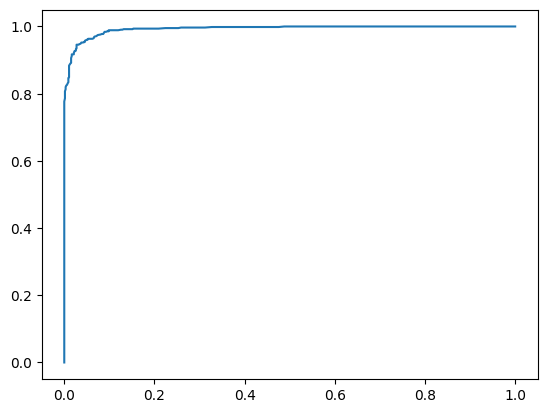

In [490]:
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Tạo GridSearchCV
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='roc_auc')

# Huấn luyện GridSearchCV trên dữ liệu huấn luyện
grid_search_rf.fit(X_train, y_train)

# In ra các tham số tối ưu và điểm số cao nhất
print("Best parameters for Random Forest:", grid_search_rf.best_params_)
print("Best cross-validation AUC-ROC score:", grid_search_rf.best_score_)

# Đánh giá mô hình tốt nhất trên tập kiểm tra
best_rf_model = grid_search_rf.best_estimator_
y_pred_proba_rf = best_rf_model.predict_proba(X_test)[:, 1]  # Lấy xác suất dự đoán cho lớp positive
auc_roc_rf = roc_auc_score(y_test, y_pred_proba_rf)
print(f"AUC-ROC score for Random Forest: {auc_roc_rf}")

# Vẽ đường cong ROC cho Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
plt.plot(fpr_rf, tpr_rf, label='Random Forest')

In [491]:
best_rf_model = grid_search_rf.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
y_pred_proba_rf = best_rf_model.predict_proba(X_test)[:, 1]
auc_roc_rf = roc_auc_score(y_test, y_pred_proba_rf)

# In kết quả
print("Random Forest:")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"F1-Score: {f1_rf:.4f}")
print(f"AUC-ROC: {auc_roc_rf:.4f}")
print()

Random Forest:
Accuracy: 0.9542
Precision: 0.9522
F1-Score: 0.9530
AUC-ROC: 0.9927



Best parameters for KNeighborsClassifier: {'knn__n_neighbors': 5, 'knn__p': 1, 'knn__weights': 'distance'}
Best cross-validation AUC-ROC score: 0.871210849155091
AUC-ROC score for KNeighborsClassifier: 0.8647117104054903


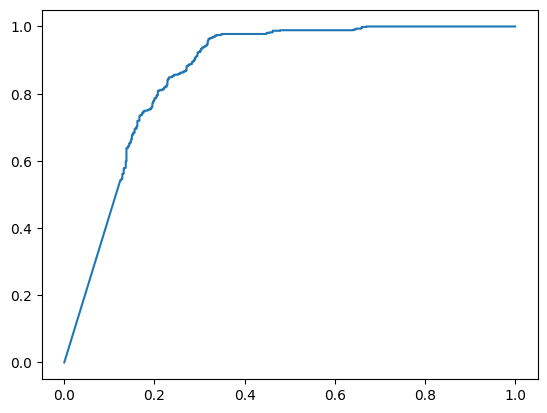

In [492]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Định nghĩa pipeline cho KNeighborsClassifier (bao gồm chuẩn hóa dữ liệu)
pipe_knn = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

# Định nghĩa các tham số cần tối ưu hóa
param_grid_knn = {
    'knn__n_neighbors': [3, 5, 7, 9],
    'knn__weights': ['uniform', 'distance'],
    'knn__p': [1, 2]
}

# Tạo GridSearchCV
grid_search_knn = GridSearchCV(pipe_knn, param_grid_knn, cv=5, scoring='roc_auc')

# Huấn luyện GridSearchCV trên dữ liệu huấn luyện
grid_search_knn.fit(X_train, y_train)

# In ra các tham số tối ưu và điểm số cao nhất
print("Best parameters for KNeighborsClassifier:", grid_search_knn.best_params_)
print("Best cross-validation AUC-ROC score:", grid_search_knn.best_score_)

# Đánh giá mô hình tốt nhất trên tập kiểm tra
best_knn_model = grid_search_knn.best_estimator_
y_pred_proba_knn = best_knn_model.predict_proba(X_test)[:, 1]  # Lấy xác suất dự đoán cho lớp positive
auc_roc_knn = roc_auc_score(y_test, y_pred_proba_knn)
print(f"AUC-ROC score for KNeighborsClassifier: {auc_roc_knn}")

# Vẽ đường cong ROC cho KNeighborsClassifier
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_proba_knn)
plt.plot(fpr_knn, tpr_knn, label='KNeighborsClassifier')


In [493]:
best_knn_model = grid_search_knn.best_estimator_
y_pred_knn = best_knn_model.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)
y_pred_proba_knn = best_knn_model.predict_proba(X_test)[:, 1]
auc_roc_knn = roc_auc_score(y_test, y_pred_proba_knn)

# In kết quả
print("KNeighborsClassifier:")
print(f"Accuracy: {accuracy_knn:.4f}")
print(f"Precision: {precision_knn:.4f}")
print(f"F1-Score: {f1_knn:.4f}")
print(f"AUC-ROC: {auc_roc_knn:.4f}")
print()

KNeighborsClassifier:
Accuracy: 0.7988
Precision: 0.7145
F1-Score: 0.8256
AUC-ROC: 0.8647



Best parameters for Decision Tree: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best cross-validation AUC-ROC score: 0.9681879774234734
AUC-ROC score for Decision Tree: 0.9714392731139143


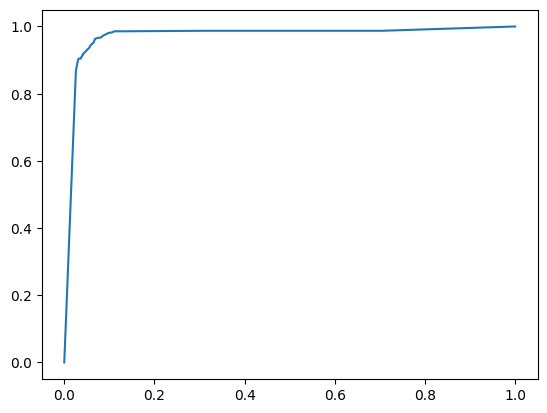

In [494]:
from sklearn.tree import DecisionTreeClassifier

# Định nghĩa các tham số cần tối ưu hóa
param_grid_dt = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Tạo GridSearchCV
grid_search_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_dt, cv=5, scoring='roc_auc')

# Huấn luyện GridSearchCV trên dữ liệu huấn luyện
grid_search_dt.fit(X_train, y_train)

# In ra các tham số tối ưu và điểm số cao nhất
print("Best parameters for Decision Tree:", grid_search_dt.best_params_)
print("Best cross-validation AUC-ROC score:", grid_search_dt.best_score_)

# Đánh giá mô hình tốt nhất trên tập kiểm tra
best_dt_model = grid_search_dt.best_estimator_
y_pred_proba_dt = best_dt_model.predict_proba(X_test)[:, 1]  # Lấy xác suất dự đoán cho lớp positive
auc_roc_dt = roc_auc_score(y_test, y_pred_proba_dt)
print(f"AUC-ROC score for Decision Tree: {auc_roc_dt}")

# Vẽ đường cong ROC cho Decision Tree
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_proba_dt)
plt.plot(fpr_dt, tpr_dt, label='Decision Tree')


In [495]:
# Đánh giá mô hình tốt nhất trên tập kiểm tra và tính toán các độ đo
best_dt_model = grid_search_dt.best_estimator_
y_pred_dt = best_dt_model.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
y_pred_proba_dt = best_dt_model.predict_proba(X_test)[:, 1]
auc_roc_dt = roc_auc_score(y_test, y_pred_proba_dt)

# In kết quả
print("Decision Tree:")
print(f"Accuracy: {accuracy_dt:.4f}")
print(f"Precision: {precision_dt:.4f}")
print(f"F1-Score: {f1_dt:.4f}")
print(f"AUC-ROC: {auc_roc_dt:.4f}")
print()

Decision Tree:
Accuracy: 0.9433
Precision: 0.9328
F1-Score: 0.9424
AUC-ROC: 0.9714

